In [26]:
#Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


In [6]:
#Load data
url = 'bank-marketing-campaign-data.csv'
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                        --------------  ----- 
 0   age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"  41188 non-null  object
dtypes: object(1)
memory usage: 321.9+ KB


In [7]:
#Preprocessing
df_baking = df_raw.copy()
df_baking[["age","job","marital","education","default","housing","loan","contact",
           "month","day_of_week","duration","campaign","pdays","previous","poutcome",
           "emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"]] = df_baking['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'].str.split(';', expand=True)
df_baking= df_baking.drop(columns='age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"')
df_baking['age'] = df_baking['age'].astype('int')
df_baking['job'] = df_baking['job'].astype('category')
df_baking['marital'] = df_baking['marital'].astype('category')
df_baking['education'] = df_baking['education'].astype('category')
df_baking['default'] = df_baking['default'].astype('category')
df_baking['housing'] = df_baking['housing'].astype('category')
df_baking['loan'] = df_baking['loan'].astype('category')
df_baking['contact'] = df_baking['contact'].astype('category')
df_baking['month'] = df_baking['month'].astype('category')
df_baking['day_of_week'] = df_baking['day_of_week'].astype('category')
df_baking['duration'] = df_baking['duration'].astype('int')
df_baking['campaign'] = df_baking['campaign'].astype('int')
df_baking['pdays'] = df_baking['pdays'].astype('int')
df_baking['previous'] = df_baking['previous'].astype('int')
df_baking['poutcome'] = df_baking['poutcome'].astype('category')
df_baking['emp.var.rate'] = df_baking['emp.var.rate'].astype('float')
df_baking['cons.price.idx'] = df_baking['cons.price.idx'].astype('float')
df_baking['cons.conf.idx'] = df_baking['cons.conf.idx'].astype('float')
df_baking['euribor3m'] = df_baking['euribor3m'].astype('float')
df_baking['nr.employed'] = df_baking['nr.employed'].astype('float')
df_baking['y'] = df_baking['y'].astype('category')
df = df_baking.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [9]:
#EDA
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['y'], random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.shape, df_test.shape

((32950, 21), (8238, 21))

In [10]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
age,32950.0,40.024097,10.412035,17.000,32.000,38.000,47.000,98.000
duration,32950.0,258.879909,259.011247,0.000,103.000,180.000,320.000,4199.000
campaign,32950.0,2.557269,2.769918,1.000,1.000,2.000,3.000,56.000
pdays,32950.0,962.867436,185.942153,0.000,999.000,999.000,999.000,999.000
previous,32950.0,0.169378,0.489152,0.000,0.000,0.000,0.000,7.000
emp.var.rate,32950.0,0.077159,1.572547,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,32950.0,93.573272,0.579627,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,32950.0,-40.518501,4.632317,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,32950.0,3.616255,1.735786,0.634,1.344,4.857,4.961,5.045
nr.employed,32950.0,5166.924395,72.284270,4963.600,5099.100,5191.000,5228.100,5228.100


,count,unique,top,freq
job,32950,12,"""admin.""",8406
marital,32950,4,"""married""",19931
education,32950,8,"""university.degree""",9766
default,32950,3,"""no""",26085
housing,32950,3,"""yes""",17268
loan,32950,3,"""no""",27203
contact,32950,2,"""cellular""",21007
month,32950,10,"""may""",10961
day_of_week,32950,5,"""mon""",6850
poutcome,32950,3,"""nonexistent""",28527


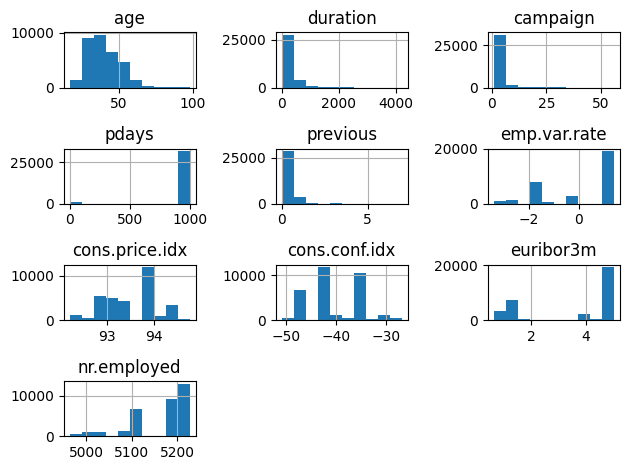

In [11]:
df_train.hist()
plt.tight_layout()
plt.show()

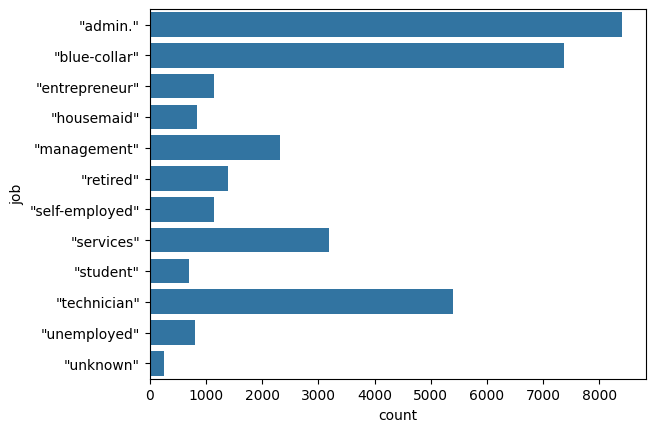

In [12]:
sns.countplot(data=df_train, y='job')
plt.show()

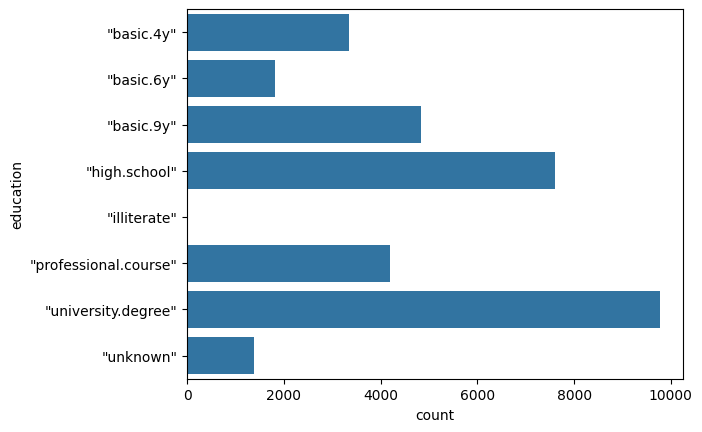

In [13]:
sns.countplot(data=df_train, y='education')
plt.show()

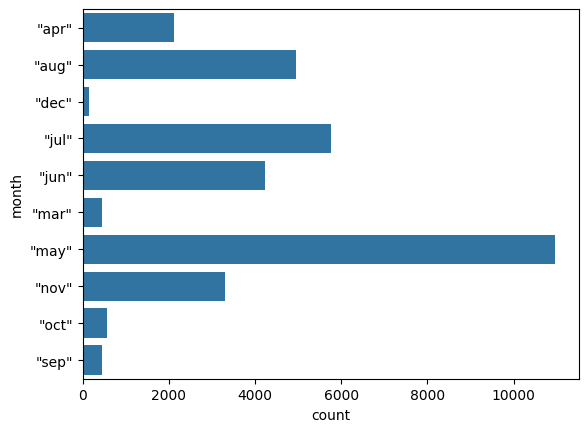

In [14]:
sns.countplot(data=df_train, y='month')
plt.show()

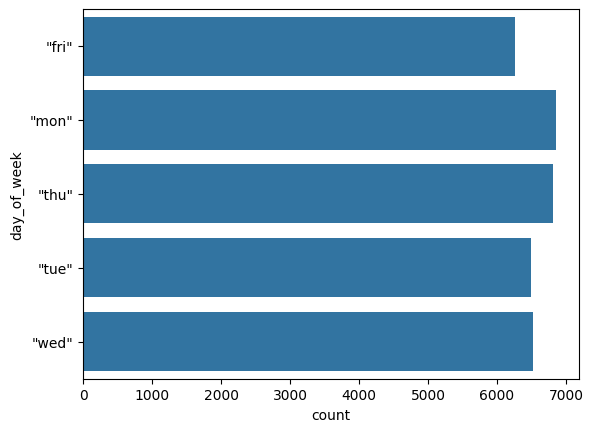

In [15]:
sns.countplot(data=df_train, y='day_of_week')
plt.show()

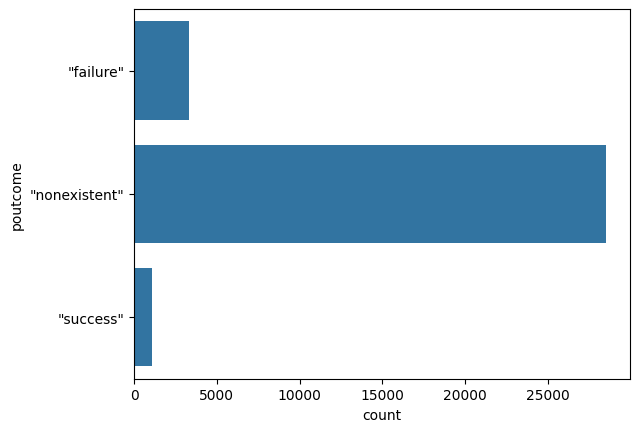

In [16]:
sns.countplot(data=df_train, y='poutcome')
plt.show()

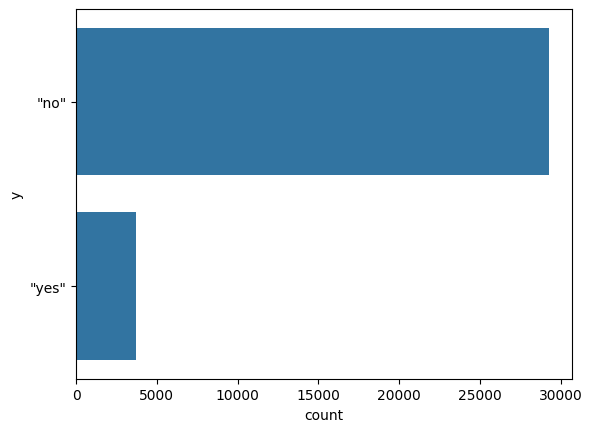

In [17]:
sns.countplot(data=df_train, y='y')
plt.show()

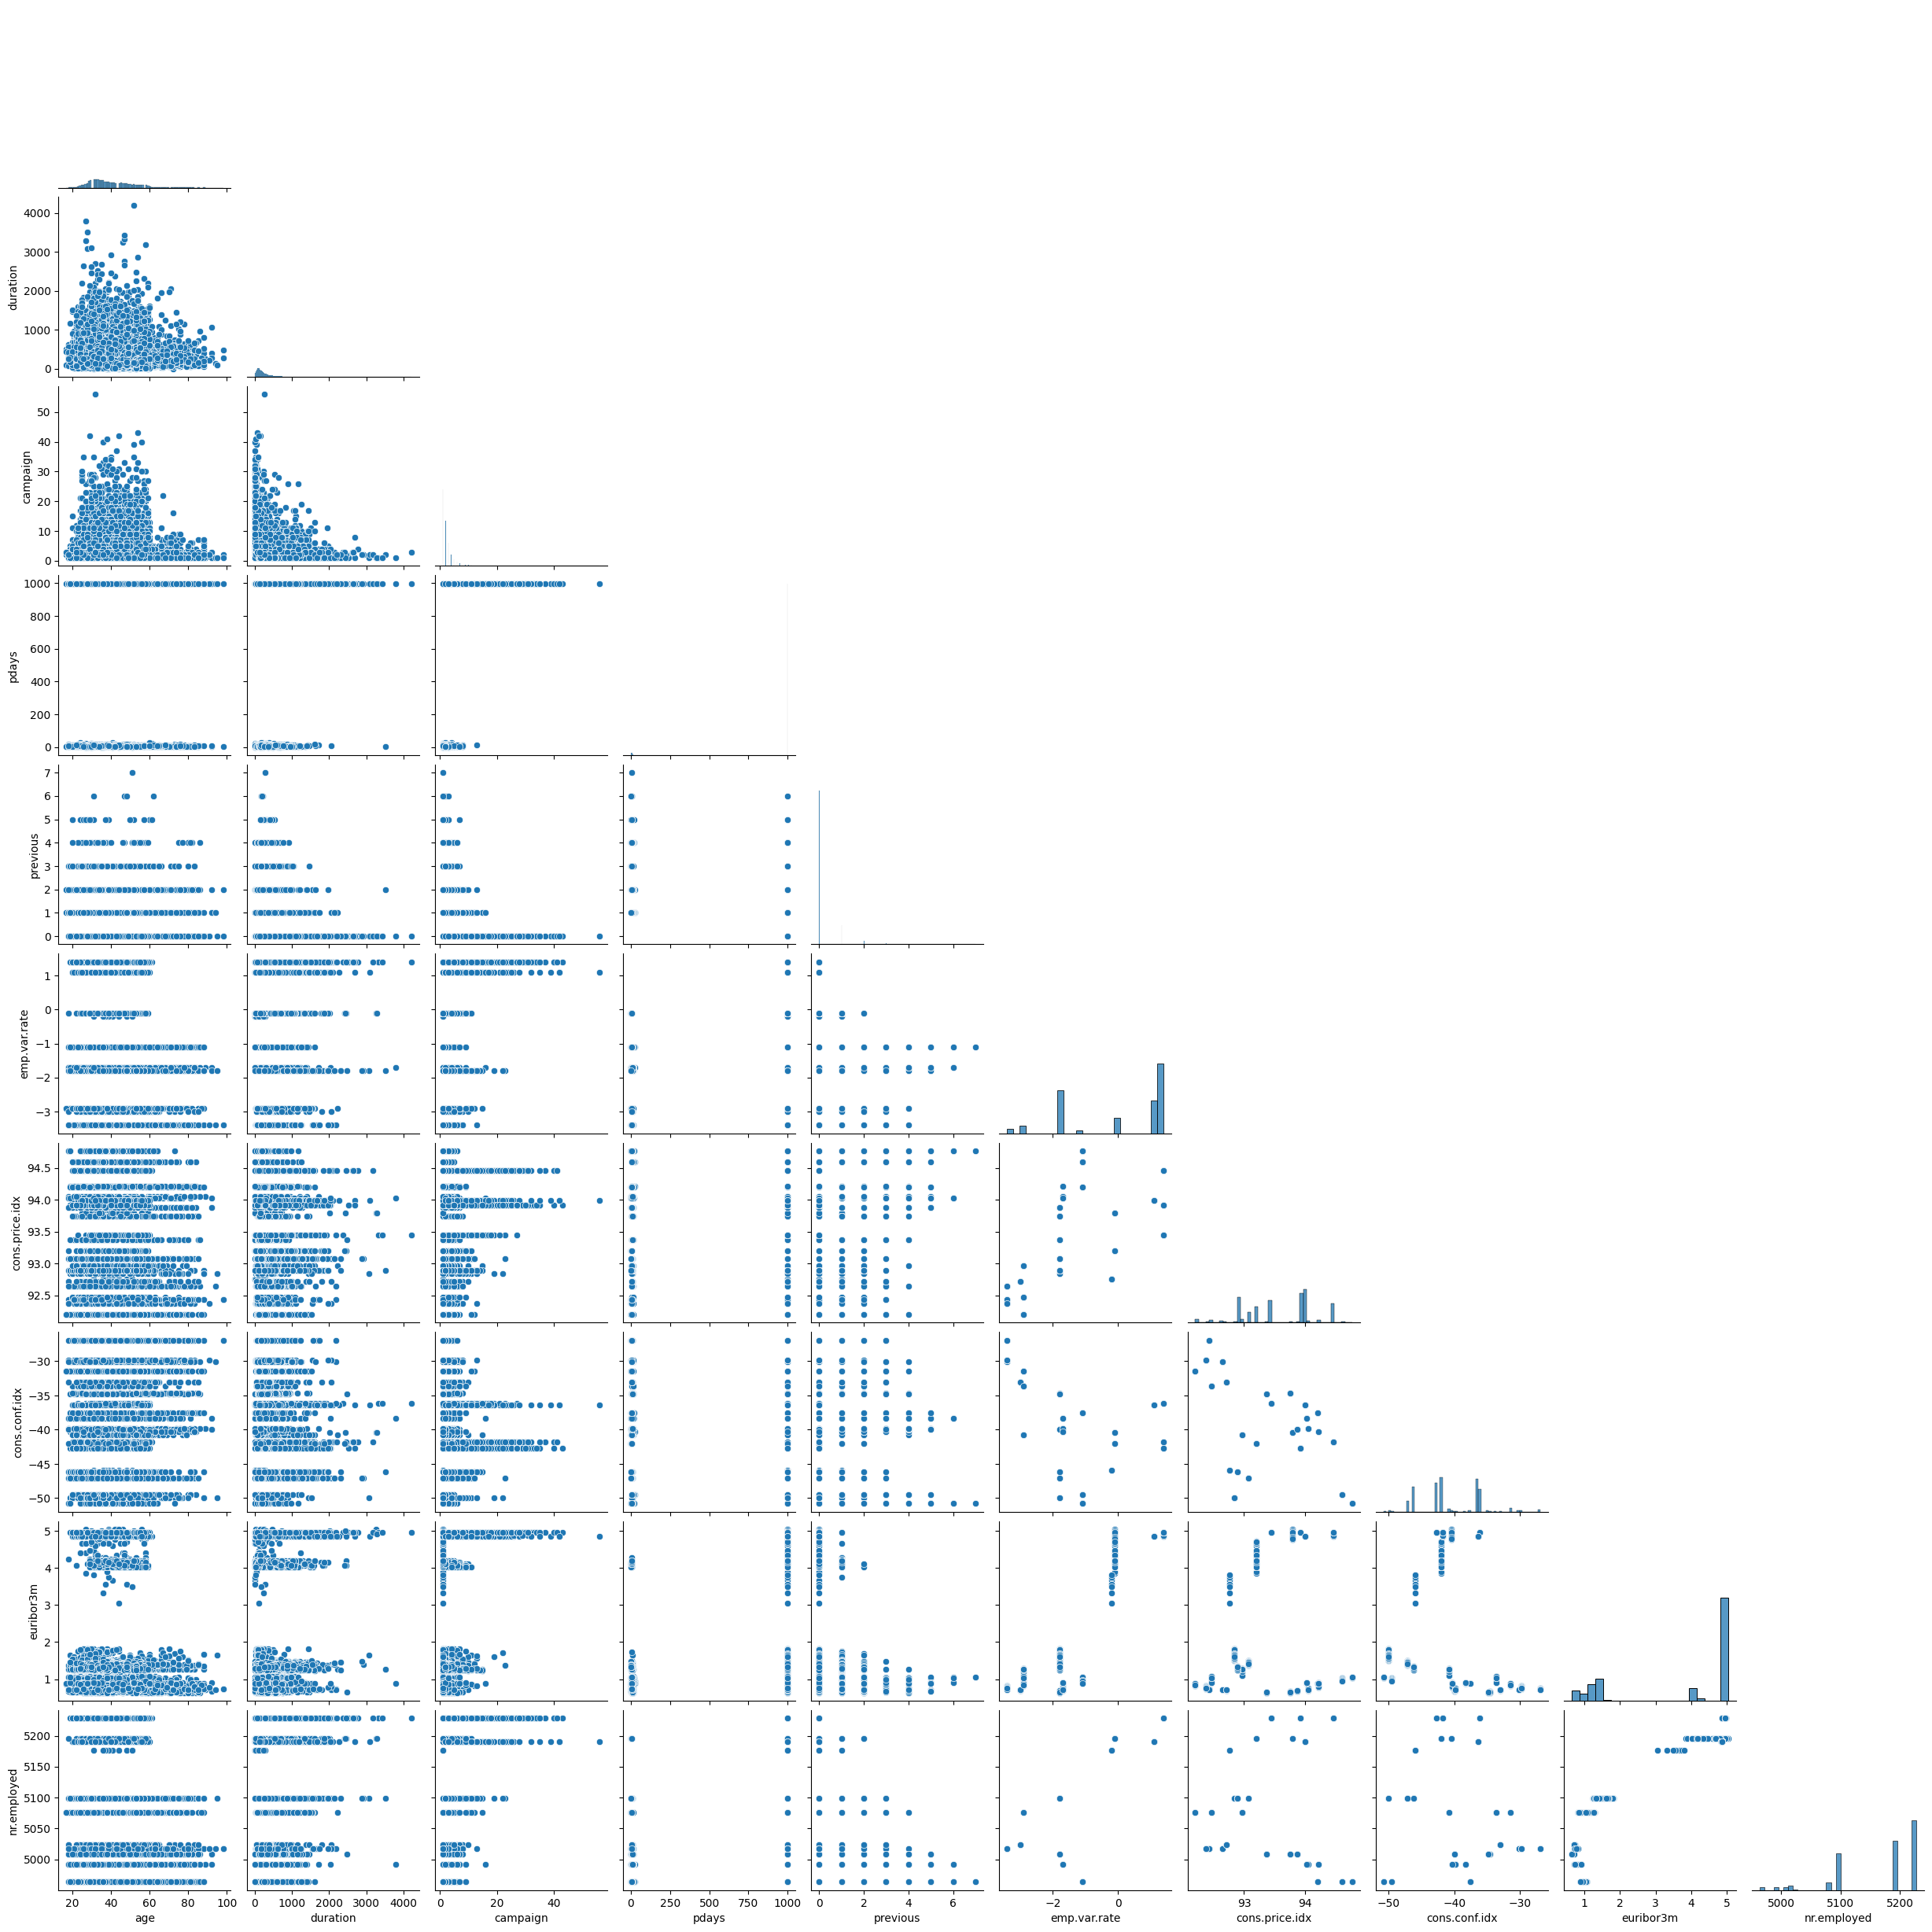

In [18]:
sns.pairplot(df_train, corner=True)
plt.show()

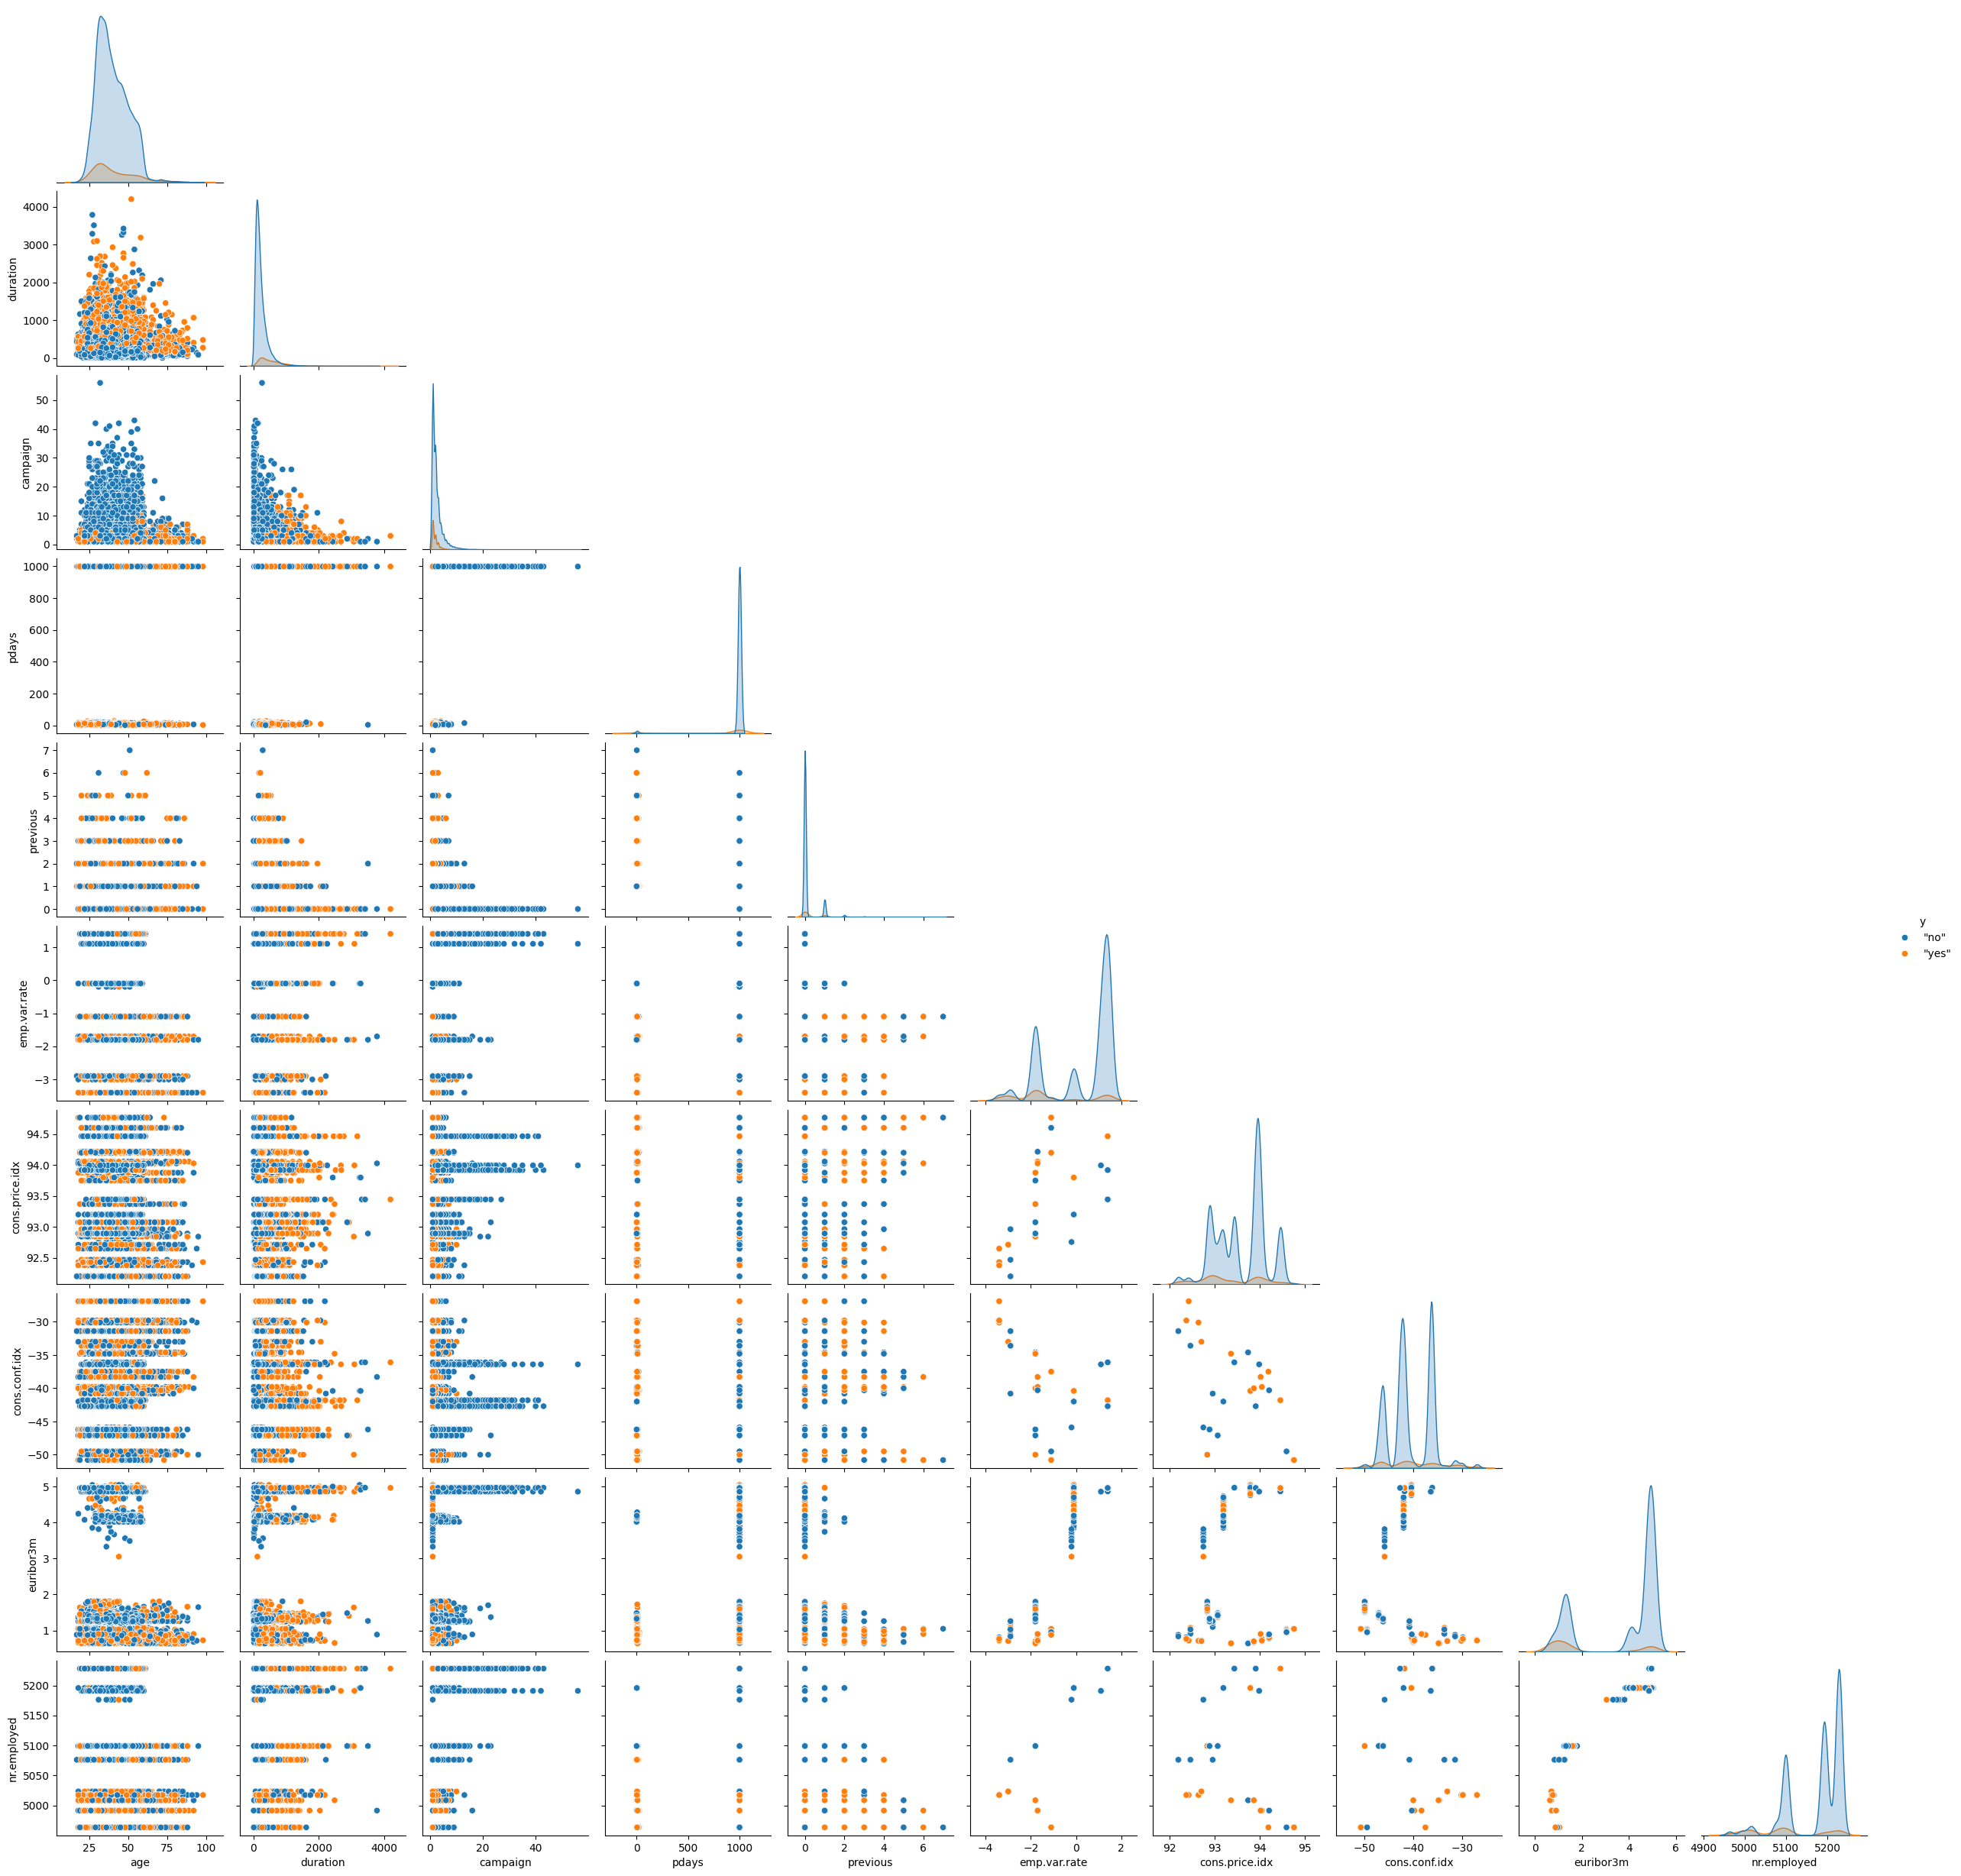

In [19]:
sns.pairplot(df_train, hue='y', corner=True)
plt.show()

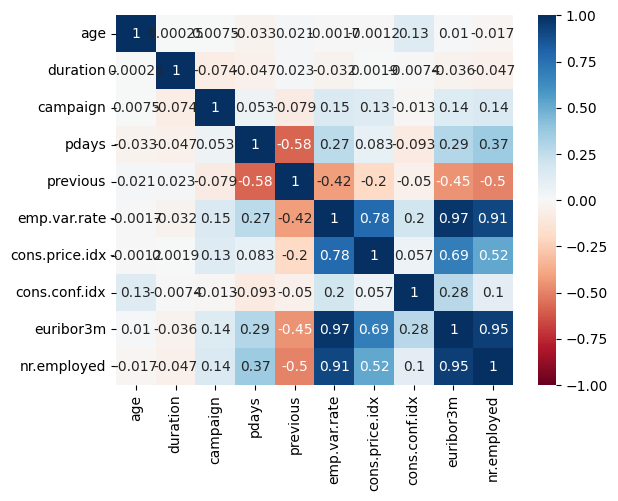

In [20]:
sns.heatmap(df_train.select_dtypes('number').corr(), vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.show()

In [28]:
#Machine learning
X_train = df[['cons.price.idx','euribor3m','nr.employed','emp.var.rate']]
y_train = df['y']
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)

X_test = df[['cons.price.idx','euribor3m','nr.employed','emp.var.rate']]
y_test = df['y']
y_test_enc = encoder.transform(y_train)

In [25]:
lr = LogisticRegression()
lr.fit(X_train,y_train_enc)

/workspaces/machine_learning_1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
y_hat_lr = lr.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test_enc, y_hat_lr)}')

Accuracy score: 0.8870544818879286
